## The SLR Model
A simple leanear regression (SLR) model is a model for bivariate data $(Z, Y)$ in which $Y$ is viewed as a function of $Z$, $\beta_{0} + \beta_{1}X$, plus the random error, $\epsilon$:


\begin{align}
Y = \beta_{0} + \beta_{1}X(Z) + \epsilon.
\end{align}

## Loading Data

In [105]:
library('dplyr')
if (!exists('opt_org')) opt_org = options()

df = read.csv('./data/tool_wear_data.csv')
head(df)

Velocity,Time,Wear,Order
400,130,0.03,4
400,75,0.02,18
400,37,0.01,14
600,200,0.09,25
600,180,0.08,22
600,170,0.07,5


## Filtering Data
Choose rows with Velocity=800.

In [110]:
df_f = filter(df, Velocity==800)

## Simple Linear Regression Model

In [99]:
lmresults = lm(Wear~Time, data=df_f)
summary(lmresults)
lmresults[1]$coefficients[[1]]
lmresults[1]$coefficients[[2]]


Call:
lm(formula = Wear ~ Time, data = df_f)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0057309 -0.0044464  0.0004526  0.0023425  0.0098654 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.335e-02  3.868e-03    3.45   0.0107 *  
Time        6.239e-04  4.823e-05   12.93 3.84e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.005332 on 7 degrees of freedom
Multiple R-squared:  0.9598,	Adjusted R-squared:  0.9541 
F-statistic: 167.3 on 1 and 7 DF,  p-value: 3.839e-06


[1] 0.01334564

[1] 0.0006238522

## Plot of the Regression Line and the Data

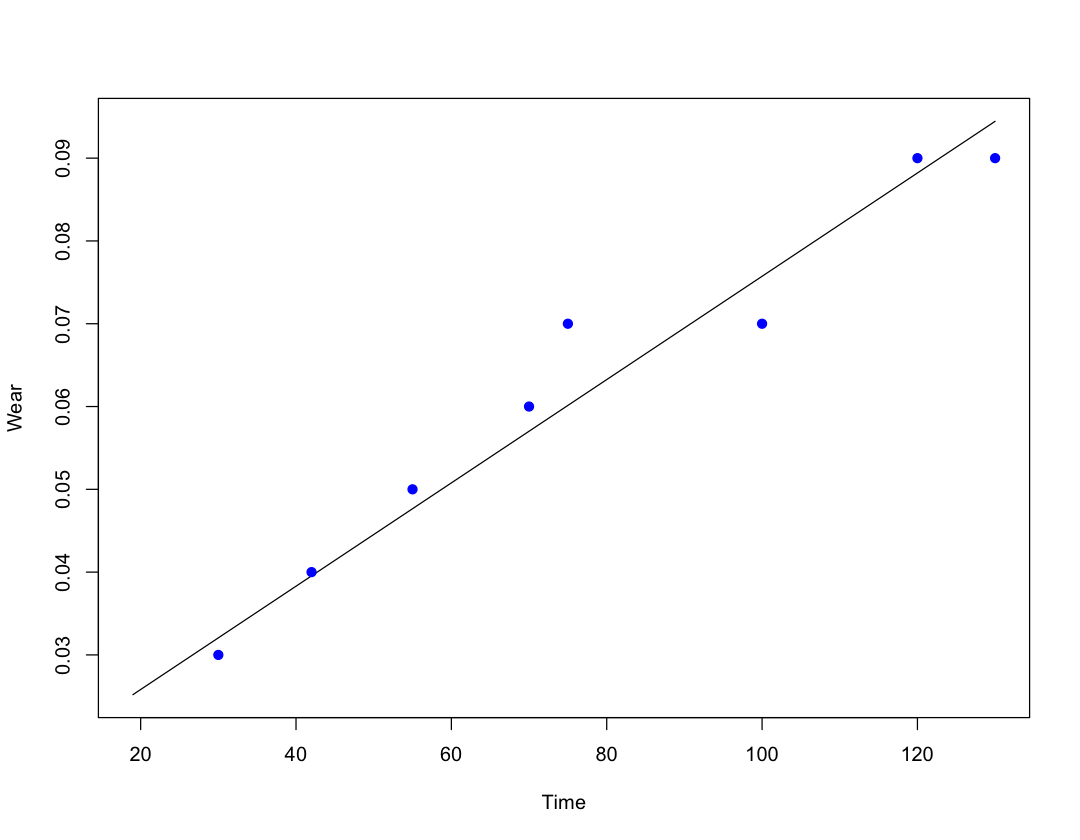

In [111]:
x = df_f$Time
y_hat = lmresults[1]$coefficients[[1]] + lmresults[1]$coefficients[[2]] * x

options(repr.plot.width=9)

plot(x, y_hat, pch=19, type='l', xlab='Time', ylab='Wear')
points(df_f$Time, df_f$Wear, pch=19, col='blue')